# **CNN model for the Fashion MNIST dataset**

In the last notebook, you have implemented a neural network model for the Fashion MNIST dataset, what was your model's accuracy on the testing set? Do you think we can further improve it?

\
In this notebook you will implement a Convolutional Neural Network (CNN) model to improve the prediction accuracy

\
**Instruction: type your code when you see 'Type your code here' in comments**

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('Tensorflow version:',tf.__version__)
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
from sklearn.model_selection import train_test_split

import os
print('Keras version:', tf.keras.__version__)

Num GPUs Available:  1
Tensorflow version: 2.6.0
Keras version: 2.6.0


# Loading the fashion_mnist data set training set

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(f'Shape of an image: {x_train[0].shape}')
print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Classes: {np.unique(y_train)}')

Shape of an image: (28, 28)
Max pixel value: 255
Min pixel value: 0
Classes: [0 1 2 3 4 5 6 7 8 9]


In [5]:
# Creating a list of labels

fashion_mnist_labels = ["T-shirt/top", 
                            "Trouser",
                            "Pullover",
                            "Dress",
                            "Coat",
                            "Sandal", 
                            "Shirt",
                            "Sneaker",
                            "Bag",
                            "Ankle boot"]

# Plotting some of the images



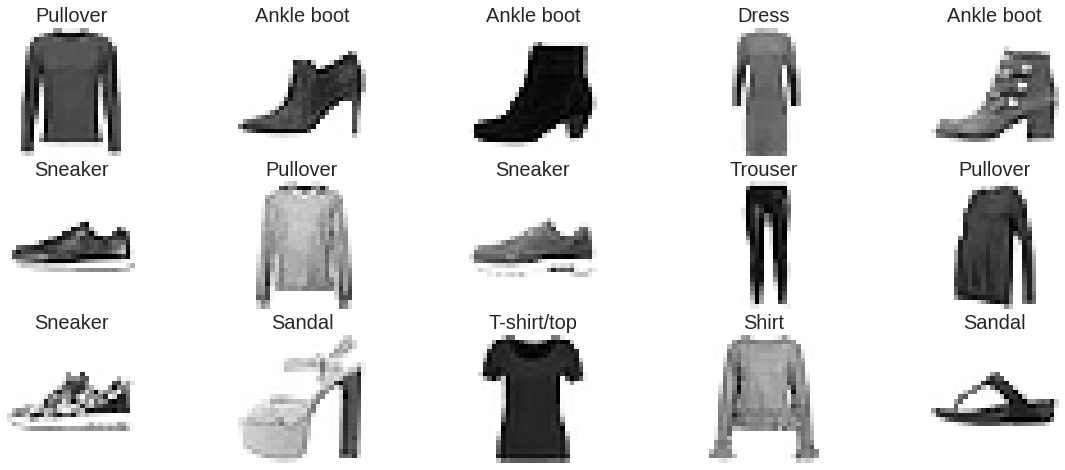

In [6]:
figure = plt.figure(figsize=(20,8))

indices = np.random.choice(np.arange(x_train.shape[0]), 15, replace=False)
subset = x_train[indices]

for i, image_sample in enumerate(subset):
  ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  j = fashion_mnist_labels[y_train[indices[i]]] #image label
  ax.set_title(j, fontsize=20)
  ax.imshow(image_sample.reshape(28,28))
  i+=1

In [8]:
#Type your code here

x_train =    #feature scaling (Hint:255 is the maximum pixel value)
x_test =  

num_classes =  #no. of classes

train_one_hot =  #one hot encoding for the training set
test_one_hot =   #one hot encdoing for the testing set

print(y_train[0])
print(train_one_hot[0])


train_size = x_train.shape[0]
test_size = x_test.shape[0]


print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Train size: {train_size}, Test size: {test_size}')
print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')
print(f'Train label shape: {train_one_hot.shape}, Test label shape: {test_one_hot.shape}')


SyntaxError: ignored

# **Model training**

## Task: In this section, we are going to define our CNN model

***Implement a CNN according to the below figure, it consists of:***

1.   **an input layer**
> Shape = INPUT_SHAPE
2.   **a CNN layer**
> No. of filter = 2,
> Kernel size = (3,3),
> Strides = (1,1),
> Padding = 'same',
> Activation='relu'
3.   **a pooling layer (try MaxPooling2D first, then AveragePooling2D to compare accuracy)**
> Pool size = (2,2), Strides = (1,1)
4.   **a flatten layer**
5.   **a dense layer**
> No. of hidden units = 100, Activation = 'relu'
6.   **an output (dense) layer**
> Activation = 'softmax'
**Hint: Remember to specify the input shape in the first layer**



![](https://drive.google.com/uc?export=view&id=1mZ33zg7PwfVNXF9ea-39fu_biV43FFYO)

**Links to the documentation for your reference:**

Input layer:
https://www.tensorflow.org/api_docs/python/tf/keras/Input

Convolutional layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

Pooling layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D


Flatten layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten


Dense layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense







In [ ]:
#Type your code here

# Reshaping the data
INPUT_SHAPE =   #input shape for one image

x_train = x_train.reshape([-1]+INPUT_SHAPE)
x_test = x_test.reshape([-1]+INPUT_SHAPE)

print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')

In [9]:
from tensorflow.keras.layers import *


tf.keras.backend.clear_session()

#Type your code here

#Define and compile your model
#=============================================





model = 

optimizer = 

model.compile()


#=============================================
model.summary()

SyntaxError: ignored

In [ ]:
tf.keras.utils.plot_model(model, "cnn_model.png", show_shapes=True)

## **Defining callback functions and training the model**

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

#Type your code here
batch_size = 
epochs = 

#Early Stopping callback function





# Starting the training
history =  #calling model.fit()




# **Plotting the learning curves**

In [ ]:
res = pd.DataFrame(history.history)
res[['loss','val_loss']].plot()

In [ ]:
res[['accuracy','val_accuracy']].plot()

# **Model evaluation on test set**

In [ ]:
#Type your code here

scores =    #calling model.evaluate()
names = model.metrics_names

for i in range(len(scores)):
  print(f'{names[i]}: {scores[i]:.4f}')

# **Making predictions and plotting the result**

In [ ]:
#Type your code here

prediction =  #calling model.predict() here


print(
    f'sum: {np.sum(prediction, axis=1)}\n'
    f'predict index: {np.argmax(prediction, axis=1)}'
)

In [ ]:
figure = plt.figure(figsize=(20,8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
   
    ax.imshow(x_test[index].reshape(28,28), cmap='gray')
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(test_one_hot[index])
   
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Are you satisfied with this model? Can the model be further improved?